In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import spearmanr
import scipy.stats as stats
import holidays
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
data = pd.read_csv(r"F:\Development\Data Glacier Internship\Week9\retail_data.csv", dtype={'Product': 'string'}, parse_dates=['date'])
data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   string        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), string(1)
memory usage: 114.3 KB


In [4]:
data.describe().round(2)

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00,1218.00
mean,2019-01-13 02:04:08.275862016,30294.68,0.25,0.47,0.21,0.35,-2.38,0.23,0.02,0.02,0.02
min,2017-02-05 00:00:00,0.00,0.00,0.00,0.00,0.00,-28.49,0.00,0.00,0.00,0.00
25%,2018-01-21 00:00:00,7212.75,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2019-01-13 00:00:00,19742.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2020-01-05 00:00:00,40282.25,0.40,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,2020-12-27 00:00:00,288322.00,0.83,1.00,1.00,1.00,3.90,1.00,1.00,1.00,1.00
std,NaN,35032.53,0.22,0.50,0.41,0.48,5.81,0.42,0.14,0.14,0.14


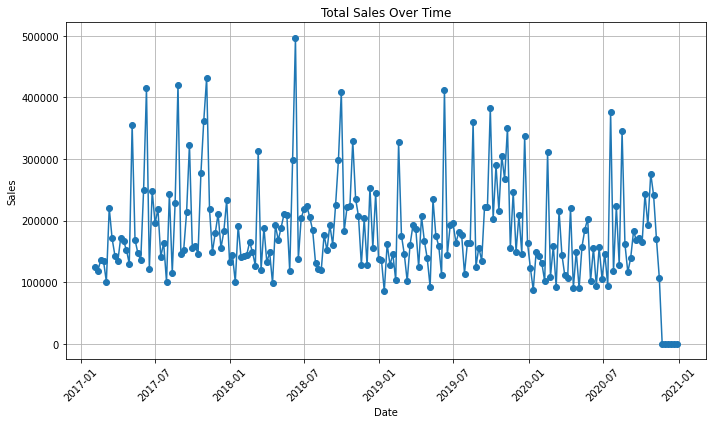

In [5]:
# Distribution of Sales over Time
data_grouped = data.groupby('date', as_index=False)['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(data_grouped['date'], data_grouped['Sales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion: There is no visible trend in the number of items sold during the examined period. However, we can conclude that the company did not experience growth during this time. There are some spikes in the number of items sold, which we attribute to higher discounts on those dates.

Encoding the Categorical Data

The Product column in our dataset contains categorical data, representing the different types of products. In order to use this data for machine learning models, we need to encode these product names into a format that can be understood by the algorithm. Most machine learning models do not directly handle categorical variables like product names, which are typically represented as strings. Therefore, encoding the Product column is a necessary step for effective model training and prediction.

In [6]:
data_1 = data.copy()
data_1 = pd.get_dummies(data_1, columns=['Product'], prefix='Product', dtype=int)

data_1.head()

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,Product_SKU1,Product_SKU2,Product_SKU3,Product_SKU4,Product_SKU5,Product_SKU6
0,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0
1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,1,0,0,0,0,0
2,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0
3,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,1,0,0,0,0,0
4,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,1,0,0,0,0,0


Extracting Numerical Features for Date

Most models (e.g., linear regression, decision trees, neural networks) don’t inherently handle datetime objects. Converting them into numerical or categorical features helps models process them effectively. Temporal features like month, day of the week, and quarter can reveal cyclical and seasonal patterns, which are critical for time series forecasting.

In [7]:
data_1['WeekOfMonth'] = data_1['date'].apply(lambda d: (d.day - 1) // 7 + 1)
data_1['Month'] = data_1['date'].dt.month
data_1['Quarter'] = data_1['date'].dt.quarter
data_1['Year'] = data_1['date'].dt.year

# data_1 = data_1.drop(columns=['date'])

data_1.head()

,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,...,Product_SKU1,Product_SKU2,Product_SKU3,Product_SKU4,Product_SKU5,Product_SKU6,WeekOfMonth,Month,Quarter,Year
0,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,...,1,0,0,0,0,0,1,2,1,2017
1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,...,1,0,0,0,0,0,2,2,1,2017
2,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,...,1,0,0,0,0,0,3,2,1,2017
3,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,...,1,0,0,0,0,0,4,2,1,2017
4,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,...,1,0,0,0,0,0,1,3,1,2017


## Visualisations

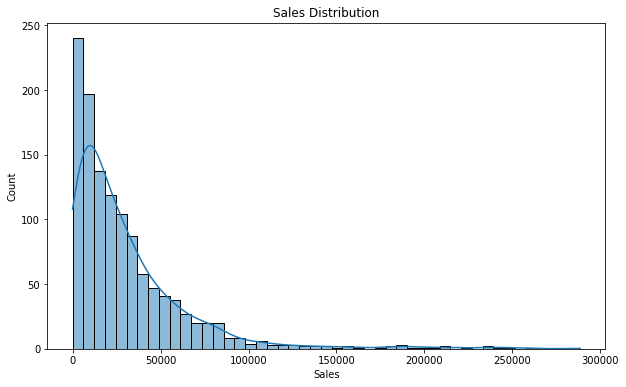

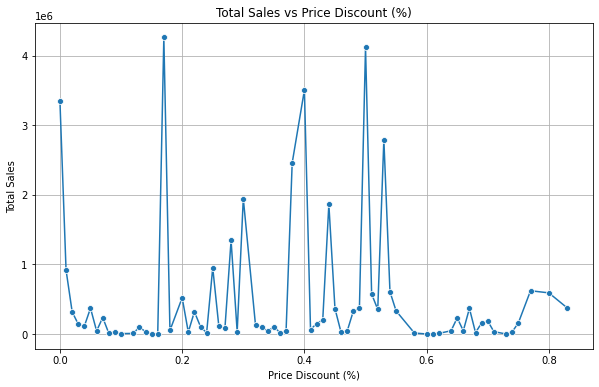

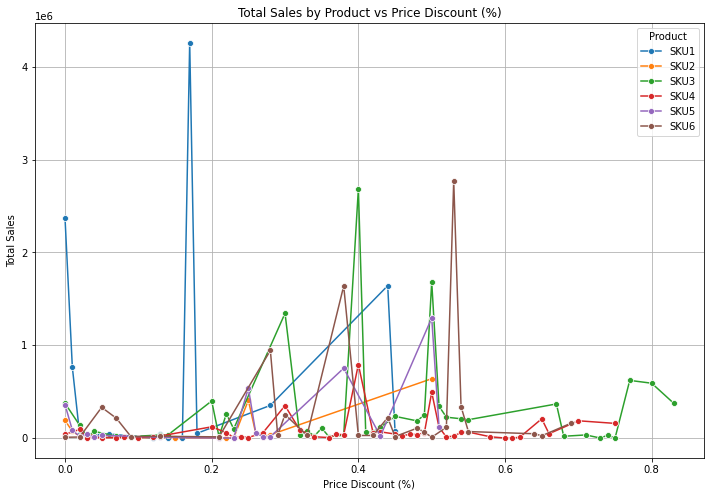

In [8]:
# Visualizing the distribution of numeric columns
plt.figure(figsize=(10, 6))
sns.histplot(data_1['Sales'], kde=True)
plt.title('Sales Distribution')
plt.show()

# Group by the 'Price Discount (%)' column and sum the 'Sales' for each discount
grouped_sales = data_1.groupby('Price Discount (%)')['Sales'].sum().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_sales, x='Price Discount (%)', y='Sales', marker='o')
plt.title('Total Sales vs Price Discount (%)')
plt.xlabel('Price Discount (%)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Group by 'Price Discount (%)' and 'Product', then sum the 'Sales' for each group
grouped_sales_ = data.groupby(['Price Discount (%)', 'Product'])['Sales'].sum().reset_index()

# Create the plot with 'Product' as hue to differentiate the products
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_sales_, x='Price Discount (%)', y='Sales', hue='Product', marker='o')

# Customize the plot
plt.title('Total Sales by Product vs Price Discount (%)')
plt.xlabel('Price Discount (%)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend(title='Product')
plt.show()

## Hypothesis Testing

Hypothesis 1.
H0: The amount of sold items does not depend on Holidays.
H1: The amount of sold items depends on Holidays.

To test this hypothesis and to potentially improve our machine learning model, we will use feature engineering to reduce the number of columns. Specifically, we will combine the 'V_DAY', 'EASTER', and 'CHRISTMAS' columns into a single binary column, 'Holiday', where a value of 0 indicates a non-holiday, and a value of 1 indicates a holiday.

In [9]:
data_example = data.copy()
data_example['Holiday'] = data_example['V_DAY'] + data_example['EASTER'] + data_example['CHRISTMAS']
data__example = data_example.drop(columns=['V_DAY','EASTER','CHRISTMAS'])

In [10]:
aus_holidays = holidays.Australia(years=[2017,2018,2019,2020])

data_2 = data.copy()

data_2['Aus_Holidays'] = 0

# Map holidays to the corresponding week date (Sunday)
for holiday_date in aus_holidays:
    week_date = holiday_date - pd.Timedelta(days=holiday_date.weekday())  # Adjust to the previous Sunday
    if week_date in data_2['date'].values:
        data_2.loc[data_2['date'] == week_date, 'Aus_Holidays'] = 1
        
data_2['Holiday'] = data_2[['Aus_Holidays', 'V_DAY']].max(axis=1)
        
data_2 = data_2.drop(columns=['V_DAY','EASTER','CHRISTMAS','Aus_Holidays'])        

data_2.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,Holiday
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0


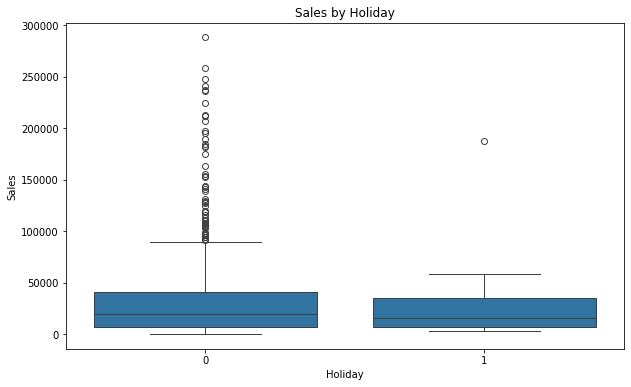

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='Sales', data=data_2)
plt.title('Sales by Holiday')
plt.show()

In [12]:
# Separate the data into holidays and non-holidays
holiday_sales = data_2[data_2['Holiday'] == 1]['Sales']
non_holiday_sales = data_2[data_2['Holiday'] == 0]['Sales']

# Mann-Whitney U test (non-parametric)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(holiday_sales, non_holiday_sales)

# Print p-value and interpretation
if p_value_mannwhitney < 0.05:
    print(f"Mann-Whitney U test p-value: {p_value_mannwhitney:.4f} - There is a significant difference between holiday and non-holiday sales.")
else:
    print(f"Mann-Whitney U test p-value: {p_value_mannwhitney:.4f} - There is no significant difference between holiday and non-holiday sales.")

Mann-Whitney U test p-value: 0.6792 - There is no significant difference between holiday and non-holiday sales.


Hypothesis 2.
H0: The discount doesn't depend on Holidays.
H1: The discount depends on Holidays.

In [13]:
holiday_discount = data_2[data_2['Holiday'] == 1]['Price Discount (%)']
non_holiday_discount = data_2[data_2['Holiday'] == 0]['Price Discount (%)']

# Mann-Whitney U test (non-parametric)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(holiday_discount, non_holiday_discount)

# Print p-value and interpretation
if p_value_mannwhitney < 0.05:
    print(f"Mann-Whitney U test p-value: {p_value_mannwhitney:.4f} - There is a significant difference between holiday and non-holiday Discounts.")
else:
    print(f"Mann-Whitney U test p-value: {p_value_mannwhitney:.4f} - There is no significant difference between holiday and non-holiday Discounts.")

Mann-Whitney U test p-value: 0.1407 - There is no significant difference between holiday and non-holiday Discounts.


## Train-Test Split

In [14]:
split_date = '2020-07-01'

# Train-test split based on the date
train_set = data_1[data_1['date'] < split_date]
test_set = data_1[data_1['date'] >= split_date]

## Correlation Analysis

High correlation between features and the target can help in selecting important predictors, while high correlations between features may indicate multicollinearity.

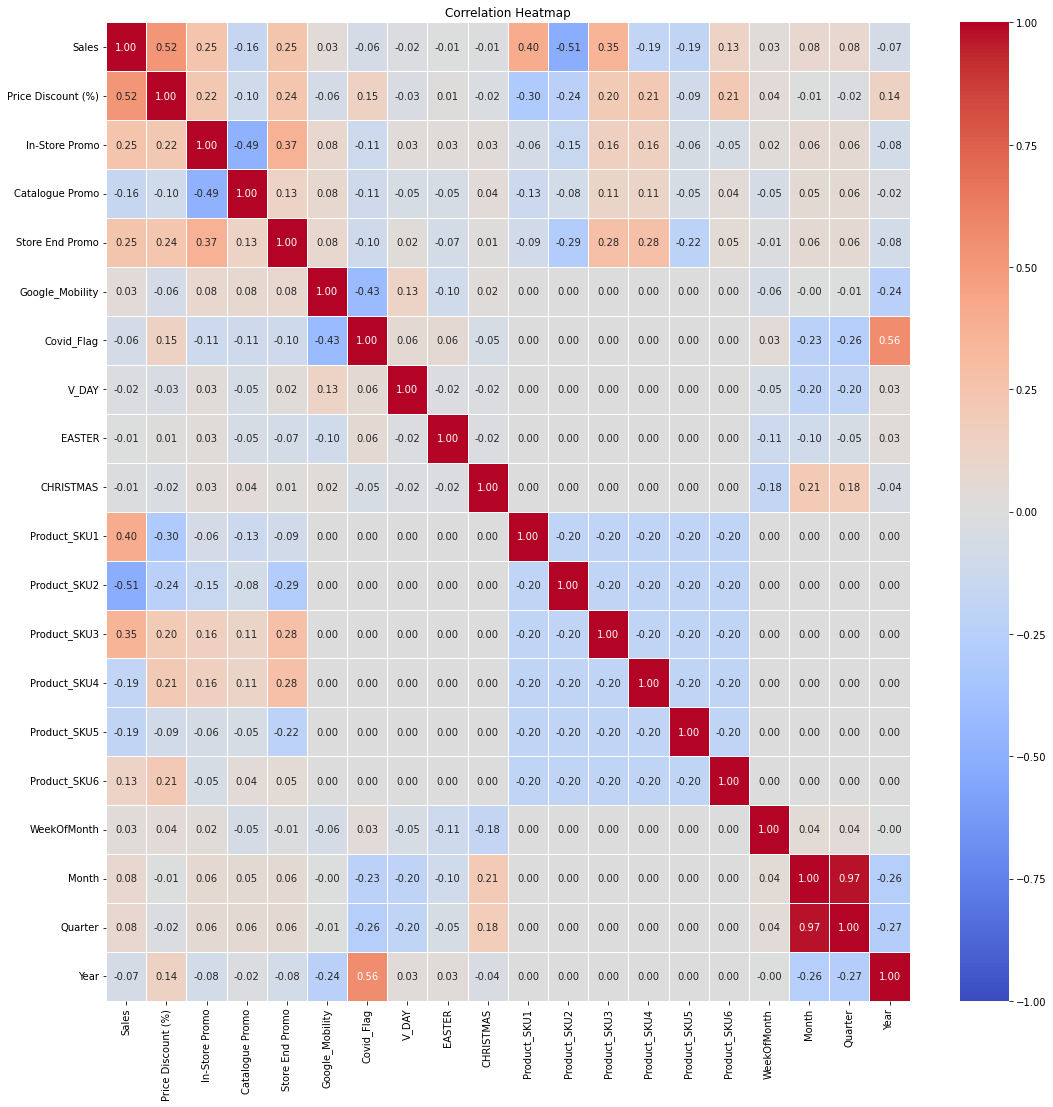

In [15]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = train_set.drop(columns=['date']).corr(method="spearman")

# Create the heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Conclusion

Low or No Correlation with Sales:

Google_Mobility, Covid_Flag, V_DAY, EASTER, CHRISTMAS, WeekOfMonth, Month, Quarter and Year show very low or near-zero correlations with Sales. We expect these variables to be linearly related to Sales, so likely don't add much predictive power and could be removed, as they don’t appear to have a meaningful relationship with Sales. 

High Inter-Correlations:

Quarter, Month, and Year have high inter-correlations (above 0.9) due to overlapping information. Covid_Flag, Google_Mobility, and Year each have little to no correlation with the target variable Sales, and Covid_Flag and Google_Mobility are moderately correlated with each other.

In-Store Promo and Store End Promo are moderately correlated (about 0.5).

Product Columns (Product_SKU1, Product_SKU2, etc.):

Since we need Product columns for product-specific sales predictions, retain all of them. Some SKUs have higher correlations with Sales, while others have low or even negative correlations. This information might indicate differences in sales behavior across products but doesn’t warrant removing any SKU column. Instead, the model can learn which products contribute more or less to overall sales.

In [16]:
train_set_new = train_set.drop(columns=['Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS', 'WeekOfMonth',
                                        'Month', 'Quarter', 'Year'])
test_set_new = test_set.drop(columns=['Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS', 'WeekOfMonth',
                                      'Month', 'Quarter', 'Year'])

What if the specific type of promotion is less important than the presence of any promotion at all? To test this theory, we’ll create a new binary column, 'Promo,' which will have a value of 1 if any of the columns 'In-Store Promo', 'Catalogue Promo', or 'Store End Promo' equals 1, and 0 if none of them does. We’ll then examine the correlation of this new factor with other factors.

In [17]:
data_3 = train_set_new.copy()
data_3['Promo'] = data_3[['In-Store Promo', 'Catalogue Promo', 'Store End Promo']].max(axis=1)
        
data_3 = data_3.drop(columns=['In-Store Promo', 'Catalogue Promo', 'Store End Promo'])        

data_3.head()

,date,Sales,Price Discount (%),Product_SKU1,Product_SKU2,Product_SKU3,Product_SKU4,Product_SKU5,Product_SKU6,Promo
0,2017-02-05,27750,0.00,1,0,0,0,0,0,0
1,2017-02-12,29023,0.00,1,0,0,0,0,0,1
2,2017-02-19,45630,0.17,1,0,0,0,0,0,0
3,2017-02-26,26789,0.00,1,0,0,0,0,0,1
4,2017-03-05,41999,0.17,1,0,0,0,0,0,0


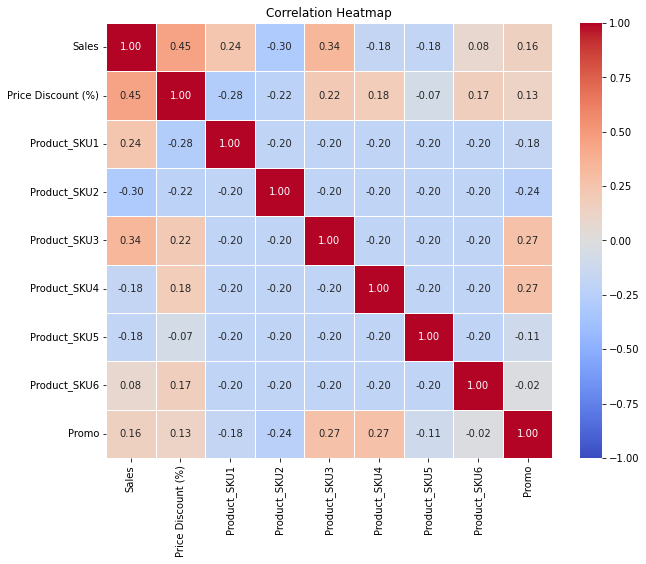

In [18]:
numeric_data_2 = data_3.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix_ = numeric_data_2.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

This worsened our results, so we will retain the original columns and use data_3.

In [19]:
# Prepare the VIF table
variance_inflation_factor_table = pd.DataFrame()
test = train_set_new.drop(columns=['Sales','date', 'Product_SKU1', 'Product_SKU2', 'Product_SKU3', 'Product_SKU4',
                               'Product_SKU5', 'Product_SKU6'])
variance_inflation_factor_table['Features'] = test.columns
variance_inflation_factor_table['VIF'] = [
    variance_inflation_factor(test.values, i) for i in range(test.shape[1])
]

variance_inflation_factor_table

,Features,VIF
0,Price Discount (%),1.883202
1,In-Store Promo,2.315055
2,Catalogue Promo,1.388078
3,Store End Promo,2.123507


None of the variables show VIF values exceeding the conventional threshold of 5, which means multicollinearity is not a significant issue in this dataset. The moderate levels observed (mostly below 3) are unlikely to harm the stability of the model.

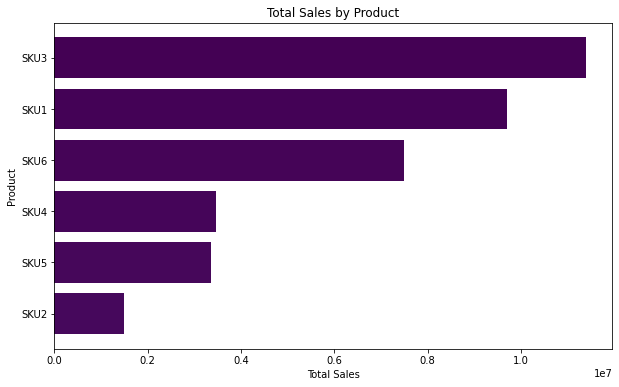

In [20]:
# Calculate total Sales for each Product
total_sales_by_product = data_2.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Create a bar plot for all products with total sales
plt.figure(figsize=(10, 6))
plt.barh(total_sales_by_product.index, total_sales_by_product.values, color=plt.cm.viridis(range(len(total_sales_by_product))))
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Sales by Product')
plt.gca().invert_yaxis()  # To display the highest sales at the top
plt.show()

Conclusion: SKU3 is the top-performing product, while SKU2 is the least popular. Over a 3-year period, the total sales difference between the two products is approximately 10 million units.

In [21]:
train_set_new.to_csv("train_set.csv", index=False)
test_set_new.to_csv("test_set.csv", index=False)